In [1]:
import pynucastro as pyna
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rl = pyna.ReacLibLibrary()
lib = rl.linking_nuclei(["he4", "c12", "o16", "ne20"])
pynet = pyna.PythonNetwork(libraries=[lib])

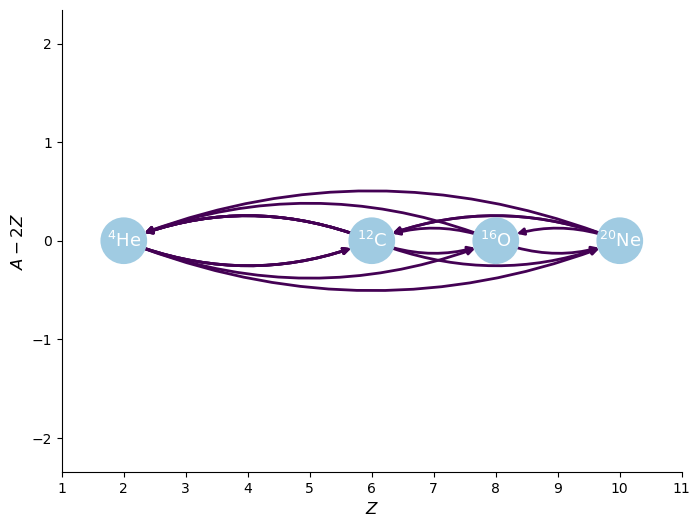

In [3]:
pynet.plot(curved_edges=True, rotated=True)

In [4]:
pynet.write_network("simple.py")

In [5]:
import simple
from pynucastro.screening import chugunov_2009

In [6]:
rho = 1.e6
T = 5.e8
X0 = np.zeros(simple.nnuc)
X0[simple.jhe4] = 0.7
X0[simple.jc12] = 0.1
X0[simple.jo16] = 0.1
X0[simple.jne20] = 0.1
Y0 = X0 / simple.A

In [7]:
Y0

array([0.175     , 0.00833333, 0.00625   , 0.005     ])

In [8]:
ydot = simple.rhs(0, Y0, rho, T, chugunov_2009)
print(ydot)

[-0.11201323  0.03725436 -0.00021685  0.00022351]


In [9]:
from scipy.integrate import solve_ivp

In [23]:
tmax = 0.2

sol = solve_ivp(simple.rhs, [0, tmax], Y0, method="BDF", jac=simple.jacobian,
                dense_output=True, args=(rho, T, chugunov_2009), rtol=1.e-10, atol=1.e-10)

In [24]:
for n in range(simple.nnuc):
    print(simple.names[n], sol.y[n,-1]*simple.A[n])

he4 0.6242990519372431
c12 0.17550416780087377
o16 0.09935320772134583
ne20 0.10084357254053751


now try integrating X

In [12]:
def rhs_wrap(t, X, rho, T, screening_func):
    # compute Y
    Y = X / simple.A
    ydot = simple.rhs(t, Y, rho, T, screening_func)
    xdot = simple.A * ydot
    return xdot

In [13]:
sol = solve_ivp(rhs_wrap, [0, tmax], X0, method="BDF",
                dense_output=True, args=(rho, T, chugunov_2009), rtol=1.e-6, atol=1.e-8)

In [14]:
for n in range(simple.nnuc):
    print(simple.names[n], sol.y[n,-1])

he4 0.6589922938582918
c12 0.14090844784608939
o16 0.0996655365657615
ne20 0.10043372172985712
